In [94]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [95]:
N = 6
Y = 1983
P = 5

Завдання 1
Зчитати tmdb_5000_movies.csv і tmdb_5000_credits.csv та описати набори даних:
1. що є «одиницею спостереження» у кожному файлі;
2. які ключові поля виконують роль ідентифікаторів фільму та як файли будуть поєднуватися;
3. які числові та категоріальні ознаки потенційно мають аналітичну цінність.

In [96]:
tmdb_5000_movies = pd.read_csv('tmdb_5000_movies.csv')
tmdb_5000_credits = pd.read_csv('tmdb_5000_credits.csv')

tmdb = pd.merge(tmdb_5000_movies, tmdb_5000_credits, left_on='id', right_on='movie_id', how='inner')

1. що є «одиницею спостереження» у кожному файлі;
    1. tmdb_5000_movies.csv - id, title, genres, budget, release_date, production_companies
       <p> tmdb_5000_credits.csv - movie_id, title, cast, crew
2. які ключові поля виконують роль ідентифікаторів фільму та як файли будуть поєднуватися;
    2. id з movies, movie_id з credits
3. які числові та категоріальні ознаки потенційно мають аналітичну цінність.
    3. budget, revenue, vote_average, vote_count, popularity - для аналізу прибутковості
        <p> genres, production_companies, status - для класифікації

Завдання 2
Виявити проблемні місця, що впливають на валідність висновків. Перевірити пропуски, аномалії і типи даних. Для кожного файлу:
* оцінити наявність пропусків у ключових полях (дата релізу, бюджет, касові збори, рейтинг, кількість голосів, популярність);
* перевірити адекватність типів (дати, числа, рядки), вказати поля, що потребують приведення до коректного типу;
* навести 2-3 приклади можливих аномалій (нульовий бюджет за великих касових зборів, нереалістичні дати тощо) і пояснити, як вони можуть викривляти результати.

In [97]:
tmdb_5000_movies[['release_date', 'budget', 'revenue', 'vote_average', 'vote_count', 'popularity']].isnull().sum()

release_date    1
budget          0
revenue         0
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [98]:
tmdb_5000_credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [99]:
tmdb_5000_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [100]:
tmdb_5000_movies['release_date'] = pd.to_datetime(tmdb_5000_movies['release_date'], errors='coerce')
tmdb_5000_movies.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [101]:
tmdb_5000_credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

Приклади аномалій - Нульовий бюджет, Дата релізу у майбутньому, Відсутня дата, Рейтинг при 0 голосах

Завдання 3
Унеможливити спотворення фінансових розрахунків через службові нулі. Замінити нульові значення у полях бюджету та касових зборів на відсутні; вилучити записи з невалідною тривалістю;
побудувати на їх основі валідні показники прибутку та окупності.
* вважати budget = 0 і revenue = 0 відсутніми значеннями та замінити їх на пропуски;
* видалити записи з runtime ≤ 0;
* розрахувати для валідних рядків profit = revenue−budget та roi =
* revenue/budget;
* надати короткий звіт: скільки нулів замінено за кожним полем і скільки рядків вилучено через невалідну тривалість.

In [102]:
zero_budget = (tmdb_5000_movies['budget'] == 0).sum()
zero_revenue = (tmdb_5000_movies['revenue'] == 0).sum()
tmdb_5000_movies[['budget', 'revenue']] = tmdb_5000_movies[['budget', 'revenue']].replace(0, np.nan)

In [103]:
runtime = (tmdb_5000_movies['runtime'] <= 0).sum()
tmdb_5000_movies = tmdb_5000_movies[tmdb_5000_movies['runtime'] > 0]

In [104]:
tmdb_5000_movies['profit'] = tmdb_5000_movies['revenue'] - tmdb_5000_movies['budget']
tmdb_5000_movies['roi'] = tmdb_5000_movies['revenue'] / tmdb_5000_movies['budget']

In [105]:
print(f"budgets replaced: {zero_budget}")
print(f"revenues replaced: {zero_revenue}")
print(f"runtimes removed: {runtime}")

budgets replaced: 1037
revenues replaced: 1427
runtimes removed: 35


Завдання 4
Поєднати дані фільмів із кредитами за ідентифікатором фільму у єдину таблицю. Після злиття:
* пояснити, чому обрано саме такий тип з’єднання;
* перевірити, чи не з’явилися дублікати записів фільмів;
* довести, що кількість унікальних фільмів відповідає очікуванням.

inner join - кожен фільм у movies приєднається до свого запису з credits

In [106]:
merged = pd.merge(
    tmdb_5000_movies,
    tmdb_5000_credits,
    left_on="id",
    right_on="movie_id",
    how="inner"
)

In [107]:
duplicate = merged['id'].duplicated()
duplicate.sum()

np.int64(0)

In [108]:
print(tmdb_5000_movies['id'].nunique())
print(tmdb_5000_credits['movie_id'].nunique())
print(merged['id'].nunique())

4766
4803
4766


всі фільми з обох таблиць були успішно поєднані

Завдання 5
Датасет містить вкладені поля (JSON): жанри та актори. Перетворити їх на плоскі таблиці для
подальшого аналізу (df.explode(...)).
* Для стовпця genres побудувати таблицю «фільм–жанр» (кожен жанр окремим рядком).
* Для стовпця cast побудувати таблицю «фільм–актор» (кожен актор окремим рядком).

In [109]:
def parse_json(x):
    try:
        return json.loads(x)
    except:
        return []

In [110]:
merged.dtypes

budget                         float64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title_x                         object
vote_average                   float64
vote_count                       int64
profit                         float64
roi                            float64
movie_id                         int64
title_y                         object
cast                            object
crew                     

In [111]:
merged['genres_parsed'] = merged['genres'].apply(parse_json)

In [112]:
genre = merged[['id', 'title_x', 'genres_parsed']].explode('genres_parsed')
genre['genre'] = genre['genres_parsed'].apply(lambda g: g.get('name') if isinstance(g, dict) else None)
genre = genre.drop(columns=['genres_parsed'])

In [113]:
merged['cast_parsed'] = merged['cast'].apply(parse_json)

In [114]:
actor = merged[['id', 'title_x', 'cast_parsed']].explode('cast_parsed')
actor['actor'] = actor['cast_parsed'].apply(lambda c: c.get('name') if isinstance(c, dict) else None)
actor = actor.drop(columns=['cast_parsed'])

Завдання 6
Обмежити подальший аналіз фільмами із датою релізу після року Y. Порівняти чисельність фільмів
до і після фільтрації.

In [115]:
merged['year'] = merged['release_date'].dt.year
before = merged['id'].nunique()
filtered = merged[merged['year'] > Y]
after = filtered['id'].nunique()

In [116]:
print(before - after)

354


Завдання 7
Визначити TOP-N найчастіше представлених жанрів серед фільмів після фільтрації за роком.

In [117]:
filtered_genres = genre[genre['id'].isin(filtered['id'])]
top = filtered_genres['genre'].value_counts().head(N)
top

genre
Drama        2112
Comedy       1638
Thriller     1199
Action       1066
Romance       821
Adventure     713
Name: count, dtype: int64

Завдання 8
Оцінити економічну доцільність виробництва за жанрами. Розрахувати прибуток фільму як
revenue−budget та обчислити середній прибуток за жанрами (на фільм) на відфільтрованій
підвибірці. Використовувати profit із завдання 3.
Вивести топ-N жанрів за прибутковістю і 3 жанри з найнижчими середніми значеннями.

In [118]:
profit = filtered_genres.merge(
    filtered[['id', 'profit']],
    on='id',
    how='left'
)

profit_genre = profit.groupby('genre')['profit'].mean().sort_values(ascending=False)

print(profit_genre.head(N))
print(profit_genre.tail(3))

genre
Animation          1.990667e+08
Adventure          1.772488e+08
Fantasy            1.671081e+08
Family             1.605037e+08
Science Fiction    1.296723e+08
Action             1.177642e+08
Name: profit, dtype: float64
genre
Documentary    2.004348e+07
Foreign       -2.249849e+06
TV Movie                NaN
Name: profit, dtype: float64


Завдання 9
Сформувати TOP-N фільмів за середнім рейтингом vote_average після фільтрації за роком Y.
Прокоментувати обмеження метрики: залежність від vote_count та можливу незіставність
рейтингів різних періодів.

In [119]:
top_rated = (
    filtered[['title_x', 'vote_average', 'vote_count', 'year']]
    .sort_values('vote_average', ascending=False)
)
top_rated.head(N)

,title_x,vote_average,vote_count,year
3516,Stiff Upper Lips,10.0,1,1998
4038,"Dancer, Texas Pop. 81",10.0,1,1998
4234,Me You and Five Bucks,10.0,2,2015
2385,One Man's Hero,9.3,2,1999
1880,The Shawshank Redemption,8.5,8205,1994
2968,There Goes My Baby,8.5,2,1994


Фільми з невеликим рейтингом можуть здаватися високо оціненими.
Старші фільми зазвичай набирають більше голосів, що робить їхній показник стабільнішим.

Завдання 10
Дослідити зв’язок активності акторів і їхньої популярності у вибірці. Вибрати акторів, які зіграли
не менше ніж у P фільмах (після фільтрації за роком). Обчислити для них середню популярність
(popularity) та визначити N акторів-лідерів.
Показати обсяг вибірки: скільки акторів пройшло поріг і скільки фільмів брало участь у розрахунку.
Пояснити, чому просте усереднення може бути вразливим до «зіркових» одиничних випадків.

In [120]:
actors_filtered = actor[actor['id'].isin(filtered['id'])]
actor_counts = actors_filtered['actor'].value_counts()

p_actors = actors_filtered[actors_filtered['actor'].isin(actor_counts[actor_counts >= P].index)]

actors_pop = p_actors.merge(
    filtered[['id', 'popularity']],
    on='id',
    how='left'
)

avg_pop = (
    actors_pop.groupby('actor')['popularity']
    .mean()
    .sort_values(ascending=False)
)

top_actors = avg_pop.head(N)
print(top_actors)

print(len(actor_counts[actor_counts >= P]))
print(len(actors_pop))

actor
Russ Fega          227.860061
Mackenzie Foy      184.079580
William Devane     179.598327
Joseph Oliveira    167.606408
Ava Acres          144.067792
Josh Stewart       132.288835
Name: popularity, dtype: float64
3568
35498


Один надзвичайно популярний фільм завищує середній рейтинг

Завдання 11
Порівняти середні рейтинги жанрів у різні часові відрізки. Розбити роки релізу на три періоди: до
2000, 2000–2010, після 2010. Побудувати зведену таблицю: рядки – жанри; стовпці – періоди;
значення – середній рейтинг vote_average.
Зробити висновки: які жанри стабільно оцінюються високо, які – демонструють спад/зростання.

In [121]:
def period_from_year(y):
    if y < 2000:
        return "До 2000"
    elif 2000 <= y <= 2010:
        return "2000-2010"
    elif pd.isna(y):
        return None
    else:
        return "Після 2010"

merged['period'] = merged['year'].apply(period_from_year)

genre_ratings = genre.merge(
    merged[['id', 'vote_average', 'period']],
    on='id',
    how='inner'
)

pivot = pd.pivot_table(
    genre_ratings,
    values='vote_average',
    index='genre',
    columns='period',
    aggfunc='mean'
)
pivot

period,2000-2010,До 2000,Після 2010
genre,,,
Action,5.943107,6.145614,5.892230
Adventure,6.059312,6.250000,6.218085
Animation,6.314050,6.820000,6.169231
Comedy,5.807830,6.241593,5.927568
Crime,6.279464,6.540580,5.931333
Documentary,6.707937,7.366667,5.526316
Drama,6.352351,6.658898,6.168121
Family,5.928881,6.276471,6.052174
Fantasy,6.024623,6.174046,6.141489


* стабільно оцінюються високо - Adventure, Animation, Drama, Fantasy, History, Foreign, Music, Romance, War
* спад - Western, Horror, TV Movie, Crime
* зростання - Adventure, Comedy, Family, Fantasy, Romance, Science Fiction

Завдання 12
Перевірити, чи є «жанрові ніші» акторів, що асоціюються з вищою прибутковістю. Для акторів, що
виконують умову «мінімум P фільмів», побудувати зведену таблицю: рядки – актори; стовпці –
жанри; значення – середній прибуток фільмів за участі відповідного актора в цьому жанрі.
Використовувати лише валідний profit із завдання 3.
Проаналізувати: чи існують актори, котрі «підсилюють» конкретні жанри з погляду економіки.

In [122]:
valid = merged[(merged['year'] > Y) & (merged['profit'].notna())]

actors_valid = actor[actor['id'].isin(valid['id'])]
genres_valid = genre[genre['id'].isin(valid['id'])]

actor_profit = actors_valid.merge(
    valid[['id', 'profit']],
    on='id',
    how='left'
)
actor_genre_profit = actor_profit.merge(
    genres_valid[['id', 'genre']],
    on='id',
    how='left'
)

actor_counts = actor_genre_profit.groupby('actor')['id'].nunique()
p_actors = actor_counts[actor_counts >= P].index

actor_genre_profit_active = actor_genre_profit[actor_genre_profit['actor'].isin(p_actors)]

actor_genre_pivot = pd.pivot_table(
    actor_genre_profit_active,
    values='profit',
    index='actor',
    columns='genre',
    aggfunc='mean'
)
actor_genre_pivot

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
actor,,,,,,,,,,,,,,,,,,,
50 Cent,9.909658e+07,NaN,NaN,6.259382e+07,-4.274242e+06,NaN,2.502803e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18785180.00,NaN,7.823836e+07,NaN,NaN
Aaron Douglas,1.270682e+08,1.494677e+08,NaN,3.853446e+07,-1.789762e+07,NaN,4.121015e+07,38534455.0,NaN,NaN,NaN,81196419.0,NaN,NaN,NaN,2.624732e+08,1.267106e+08,NaN,NaN
Aaron Eckhart,2.065472e+08,2.523904e+07,NaN,4.144728e+07,2.364282e+08,NaN,1.221834e+08,NaN,NaN,NaN,NaN,6154592.0,NaN,15334906.0,9328269.50,6.098161e+07,1.366714e+08,NaN,NaN
Aaron Paul,1.345543e+08,1.879409e+08,NaN,8.093733e+07,7.749964e+07,NaN,5.604967e+07,NaN,NaN,NaN,NaN,17721635.0,NaN,NaN,-5097885.00,2.315140e+06,9.887214e+07,NaN,NaN
Aaron Stanford,2.735356e+08,2.735356e+08,NaN,2.741288e+06,-1.939157e+06,NaN,4.010655e+05,NaN,NaN,NaN,NaN,54623713.0,NaN,NaN,2741288.00,2.735356e+08,2.005649e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoe Saldana,4.143388e+08,4.928867e+08,47437106.0,6.549995e+07,2.301309e+07,NaN,3.920777e+07,48289068.0,1.037804e+09,NaN,NaN,NaN,28643480.0,-1420000.0,42020627.25,7.651622e+08,2.075857e+07,NaN,NaN
Zooey Deschanel,-2.339716e+07,6.603274e+07,64044513.0,4.230085e+07,NaN,NaN,1.267102e+07,84377127.5,1.413985e+08,NaN,NaN,NaN,-12616311.0,-14280643.0,31039429.00,7.894111e+07,1.920568e+07,NaN,-15288207.0
Zoë Bell,7.245962e+07,1.661686e+08,NaN,1.050000e+08,1.117601e+08,NaN,1.359403e+08,NaN,1.748035e+08,NaN,NaN,66420686.0,105000000.0,138964344.5,NaN,7.849856e+07,-2.556678e+07,NaN,218564177.5


Завдання 13
Зменшити вплив низької кількості голосів на підсумкове ранжування. Створити показник

Додати його до таблиці фільмів (після фільтрації за роком) і визначте TOP-N стрічок за Score.
Пояснити, чим такий підхід кращий/гірший за чистий vote_average.

In [123]:
filtered = merged[merged['year'] > Y].copy()

filtered['score'] = (filtered['vote_average'] * filtered['vote_count']) / filtered['vote_count'].max()

top = (
    filtered[['title_x', 'vote_average', 'vote_count', 'score']]
    .sort_values('score', ascending=False)
    .head(N)
)
top

,title_x,vote_average,vote_count,score
96,Inception,8.1,13752,8.100000
65,The Dark Knight,8.2,12002,7.156515
95,Interstellar,8.1,10867,6.400720
16,The Avengers,7.4,11776,6.336707
0,Avatar,7.2,11800,6.178010
788,Deadpool,7.4,10995,5.916449


Нова метрика покращує стабільність рейтингу, зменшуючи вплив фільмів з невеликою кількістю голосів

Завдання 14
Побудувати гістограму vote_average і описати форму розподілу (наближено нормальний,
правостороннє/лівостороннє зміщення, наявність «хвостів»). Зробити висновок щодо доцільності
використання середнього/медіани у подальшому аналізі.

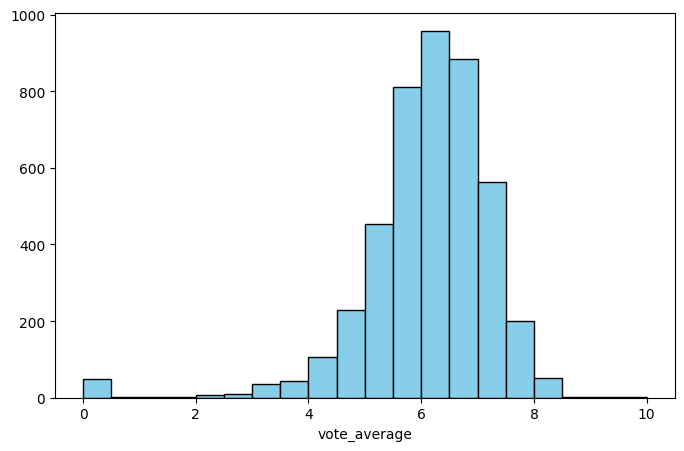

In [126]:
plt.figure(figsize=(8,5))
plt.hist(filtered['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("vote_average")
plt.show()

Розподіл vote_average приблизно нормальний, але трохи зміщений праворуч. Правий хвіст довший.

Медіана забезпечує більш надійний показник центральної тенденції.

Завдання 15
Виявити часові тренди економічної ефективності. Для кожного року розрахувати середній прибуток
(revenue−budget) і побудувати лінійний графік «рік → середній прибуток». Ігнорувати роки з
надто малою кількістю фільмів (<10).
Зробити висновки щодо трендів. Чи помітні «пікові» роки або періоди спаду?

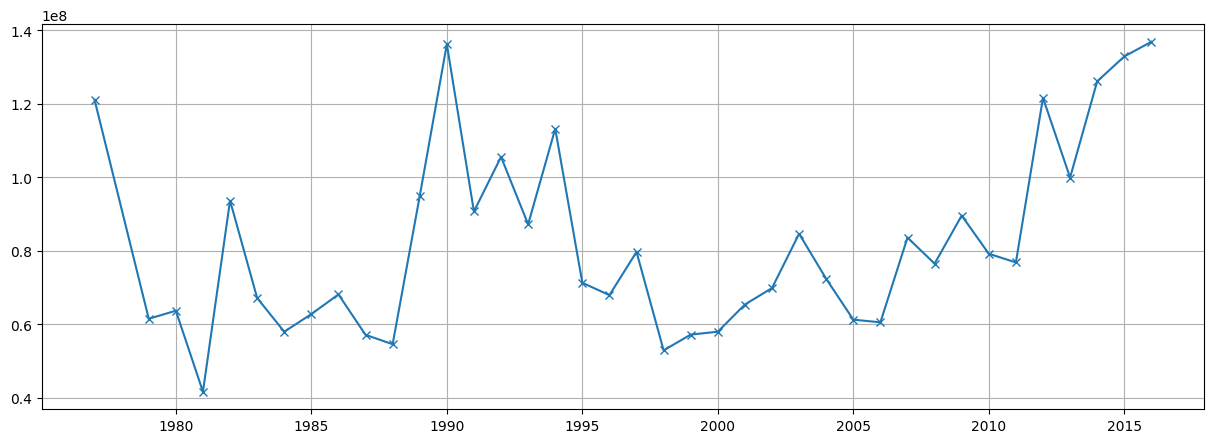

In [132]:
valid = merged.dropna(subset=['profit']).copy()

yearly_profit = (
    valid[valid['year'].isin(valid.groupby('year').size()[valid.groupby('year').size() >= 10].index)]
    .groupby('year')['profit']
    .mean()
)

plt.figure(figsize=(15,5))
plt.plot(yearly_profit.index, yearly_profit.values, marker='x')
plt.grid(True)
plt.show()

Завдання 16
Візуально порівняти «економічну привабливість» жанрів. Побудувати стовпчикову діаграму
середнього прибутку за жанрами (за даними після фільтрації). Використовувати profit із завдання 3. Пояснити, які жанри виглядають найбільш/найменш прибутковими та чи збігається це з вашими
попередніми спостереженнями (із завдання 8).

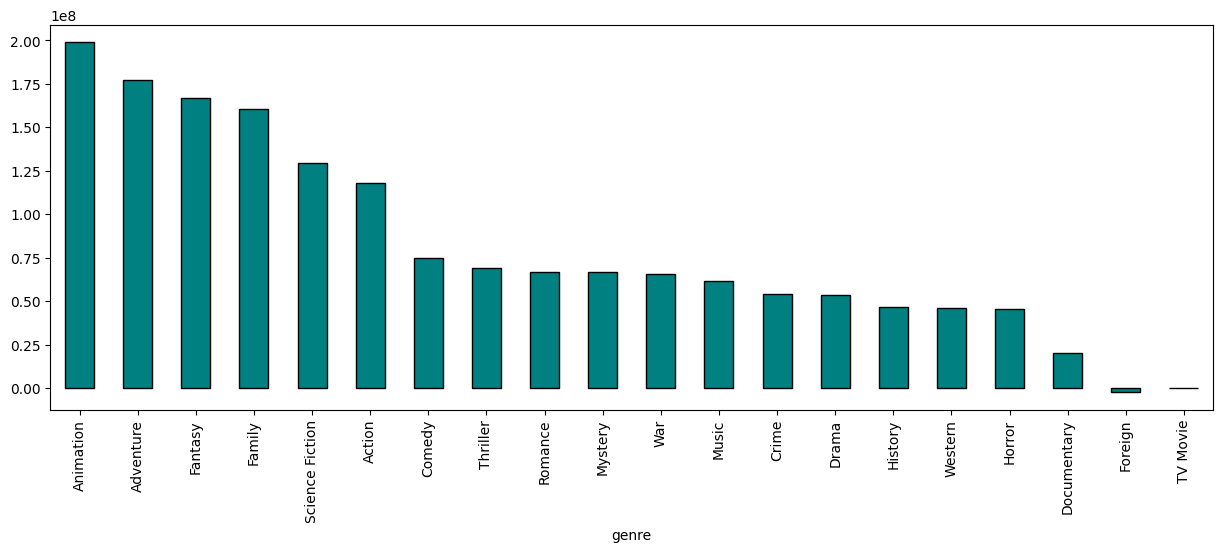

In [138]:
genre_profit = (
    filtered.merge(genre, left_on='id', right_on='id')
)

profit_by_genre = (
    genre_profit.groupby('genre')['profit']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(15,5))
profit_by_genre.plot(kind='bar', color='teal', edgecolor='black')

plt.show()

Збігається з попередніми спостереженнями (із завдання 8)

Animation          1.990667e+08

Adventure          1.772488e+08

Fantasy            1.671081e+08

Family             1.605037e+08

Science Fiction    1.296723e+08

Action             1.177642e+08

Завдання 17
Перевірити, чи корелює масштаб виробництва з комерційним результатом. Обчислити коефіцієнт
кореляції Пірсона між budget і profit на відфільтрованій вибірці. Інтерпретувати отриманий
результат.

In [141]:
filtered_valid = filtered.dropna(subset=['budget', 'profit'])
filtered_valid[['budget', 'profit']].corr(method='pearson').iloc[0,1]

np.float64(0.5617089237964528)

Фільми з більшими бюджетами генерують більший прибуток, але цей зв'язок далекий від ідеального

Завдання 18
Оцінити внесок режисерів у середню успішність проєктів. Із поля crew виділити записи з посадою
Director. Для режисерів, що мають не менше P фільмів у вибірці, розрахувати середній прибуток і
навести TOP-N імен.
Пояснити, як відбір за P впливає на надійність порівняння режисерів.

In [150]:
merged['crew_parsed'] = merged['crew'].apply(parse_json)

crew_exploded = merged[['id', 'title_y', 'crew_parsed']].explode('crew_parsed')

directors = crew_exploded[
    crew_exploded['crew_parsed'].apply(lambda d: isinstance(d, dict) and d.get('job') == 'Director')
].copy()

directors['director'] = directors['crew_parsed'].apply(lambda d: d.get('name'))
directors = directors[['id', 'director']]

filtered_valid = merged[(merged['year'] > Y) & (merged['profit'].notna())]

dir_valid = directors[directors['id'].isin(filtered_valid['id'])]
dir_profit = dir_valid.merge(
    filtered_valid[['id', 'profit']],
    on='id',
    how='left'
)

dir_counts = dir_profit.groupby('director')['id'].nunique()
active_directors = dir_counts[dir_counts >= P].index

dir_active = dir_profit[dir_profit['director'].isin(active_directors)]

avg_profit_director = (
    dir_active.groupby('director')['profit']
    .mean()
    .sort_values(ascending=False)
)

top_directors = avg_profit_director.head(N)
top_directors

director
James Cameron        7.338099e+08
Peter Jackson        5.784048e+08
Carlos Saldanha      4.710298e+08
Francis Lawrence     4.698914e+08
Christopher Nolan    4.028104e+08
Eric Darnell         3.733625e+08
Name: profit, dtype: float64

Вищий поріг P підвищує надійність рейтингу, оскільки середній прибуток режисера менше залежить від окремих випадків

Завдання 19
Дослідити, чи відрізняється середня оцінка фільмів між мовними групами. Для кожної мови
оригіналу (original_language) обчислити кількість фільмів і середній рейтинг. Відібрати лише
мови з репрезентативним обсягом (не менше 20 фільмів), сформувати TOP-N мов за середнім
рейтингом.
Зробити висновок про можливі чинники, що стоять за відмінностями.

In [149]:
data = merged[merged['year'] > Y].copy()

lang_stats = (
    data.groupby('original_language')
        .agg(
            film_count=('id', 'count'),
            avg_rating=('vote_average', 'mean')
        )
        .sort_values('avg_rating', ascending=False)
)

lang_rep = lang_stats[lang_stats['film_count'] >= 20]

top_lang = lang_rep.head(N)
top_lang

,film_count,avg_rating
original_language,,
es,32,6.659375
fr,67,6.398507
zh,27,6.300000
de,22,6.213636
en,4136,6.037693


Англомовні фільми домінують за кількістю, але мають нижчі середні рейтинги через велику кількість низькорейтингових. Інші демонструють вищі середні рейтинги, що відображає вибіркові високоякісні фільми